In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import imblearn
from datetime import datetime as dt
import sweetviz
from sklearn.model_selection import train_test_split
from sklearn import svm
from math import ceil
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.pipeline import Pipeline as imbPipe
from xgboost import  XGBClassifier
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostRegressor, Pool
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
from lightgbm import LGBMClassifier
import lightgbm as lgb
import statsmodels.api as sm
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

### Análisis de la Información

In [2]:
measurements = pd.read_csv('measurements.csv')

In [3]:
measurements.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


In [4]:
report_measurements = sweetviz.analyze(measurements)

                                             |          | [  0%]   00:00 -> (? left)


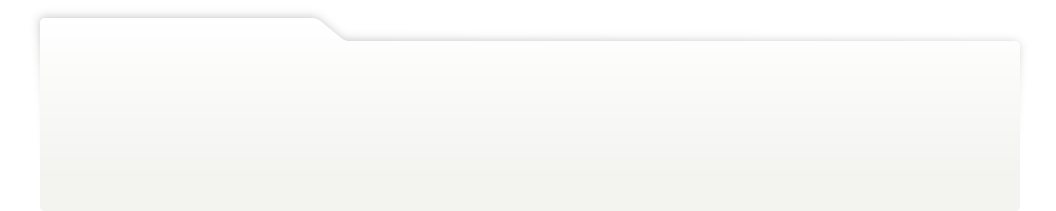
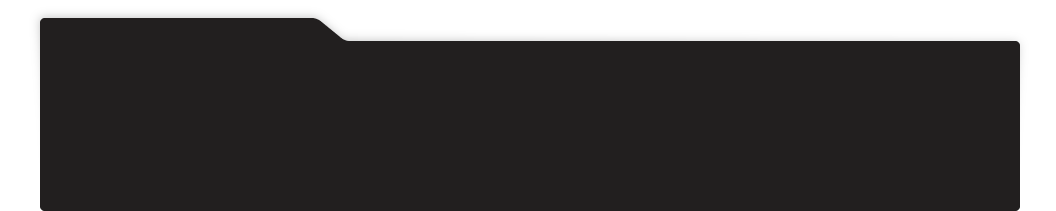
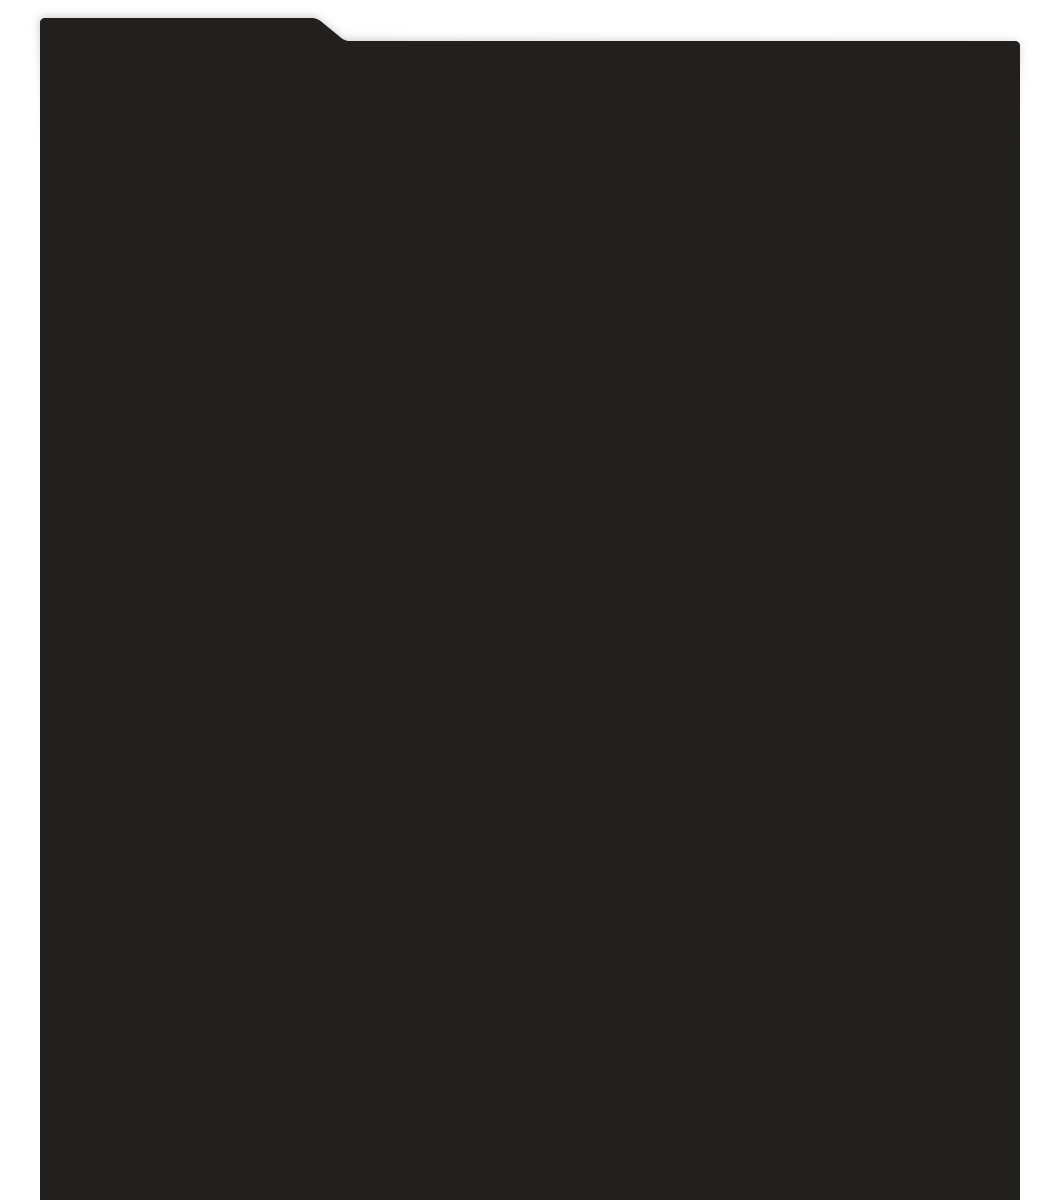
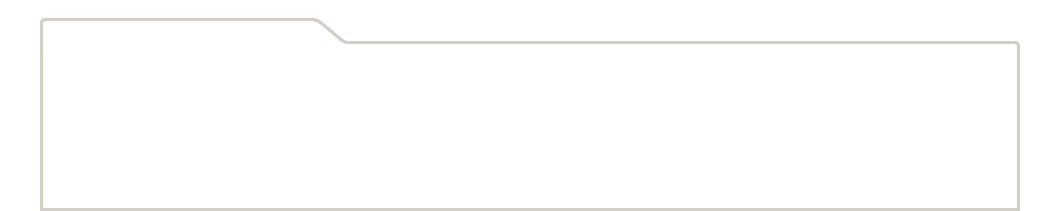
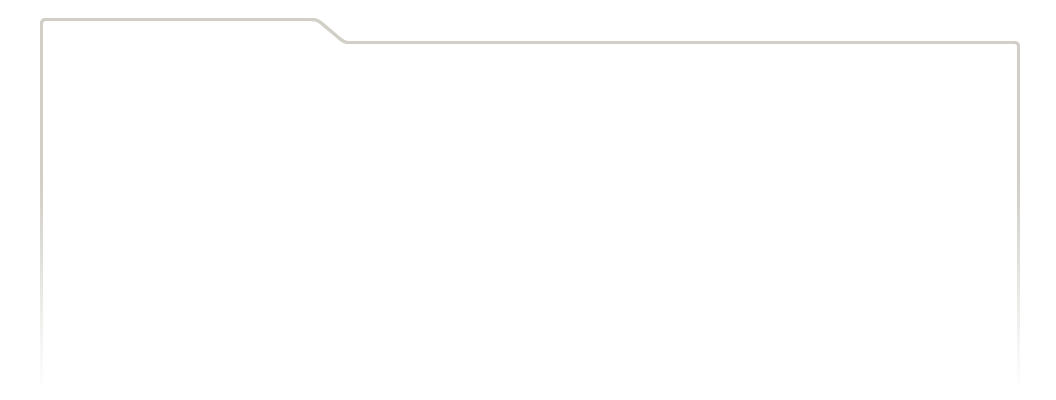
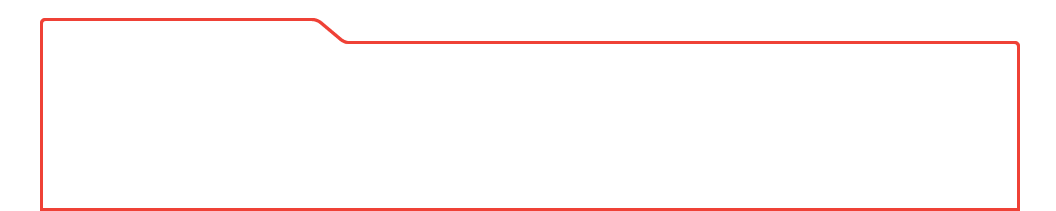
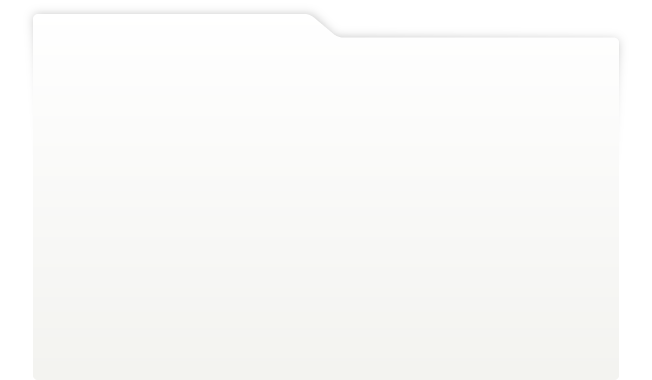
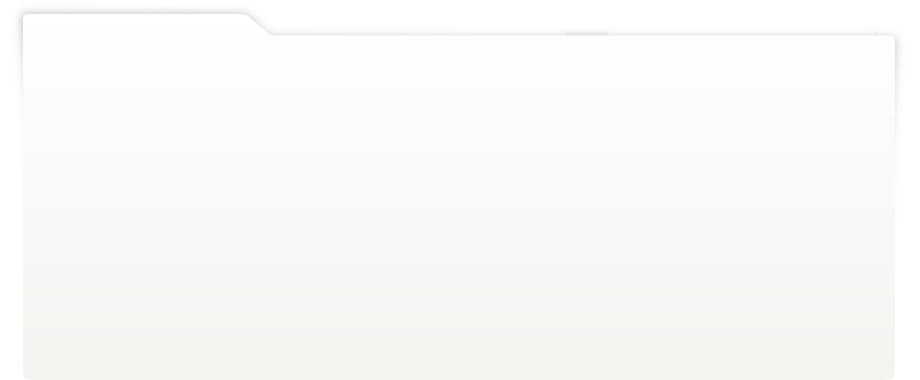
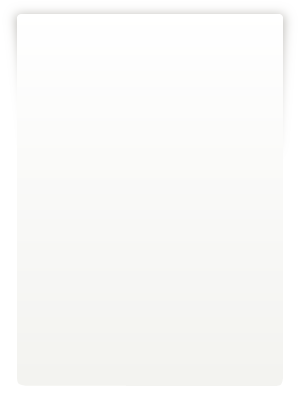
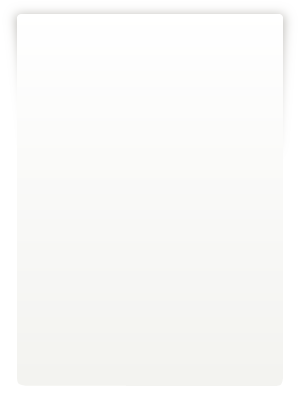
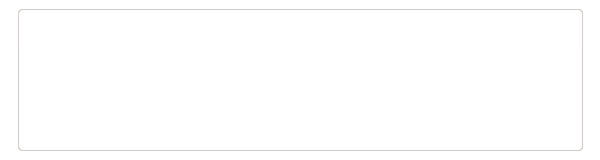
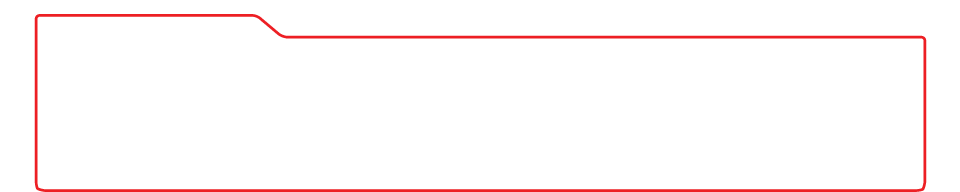
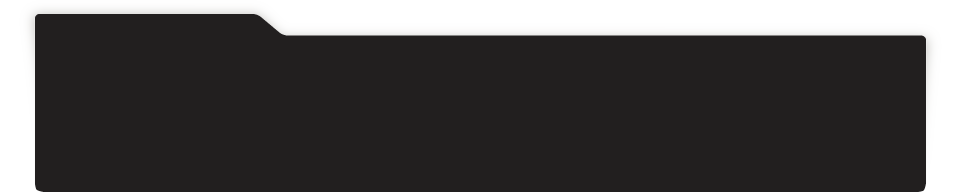
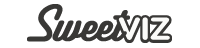
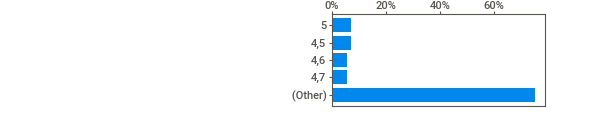
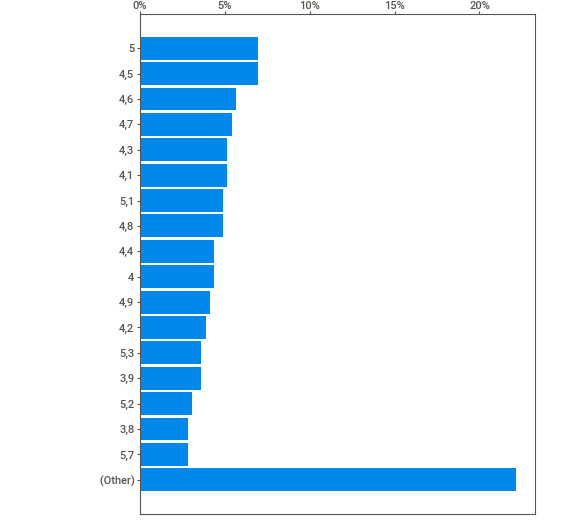
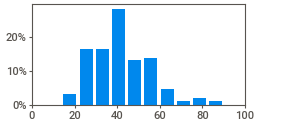
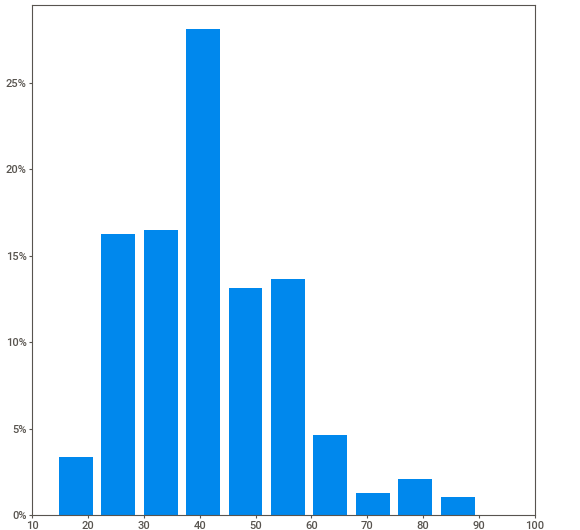
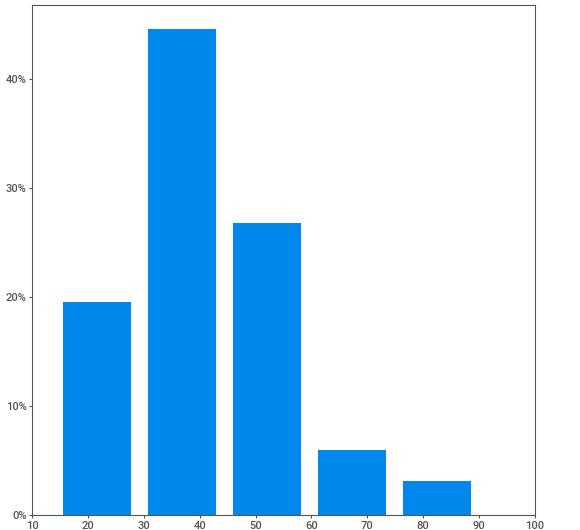
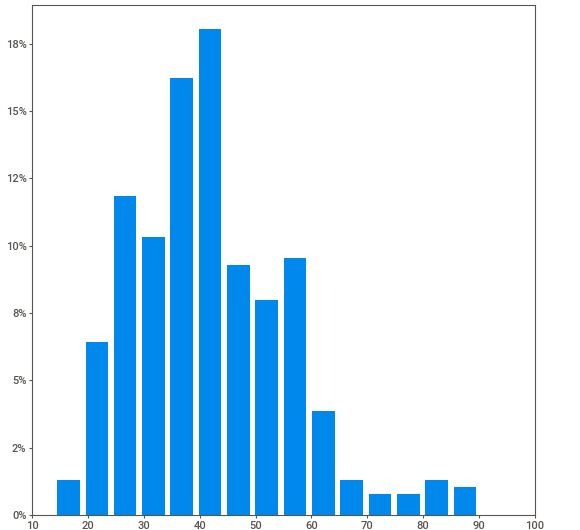
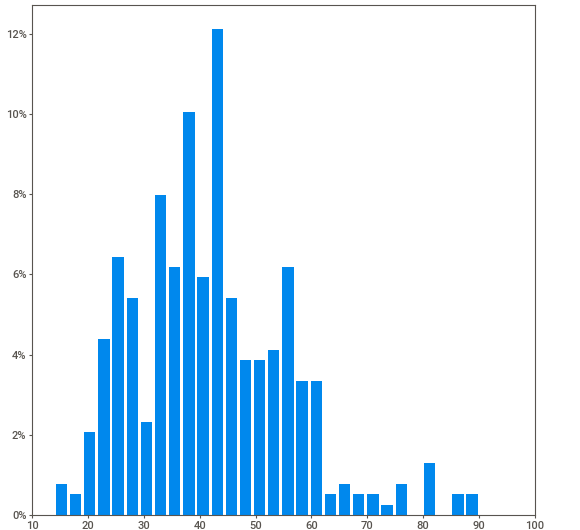
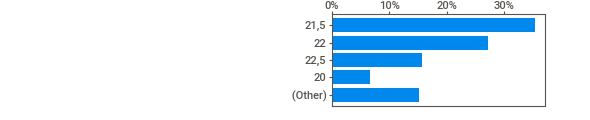
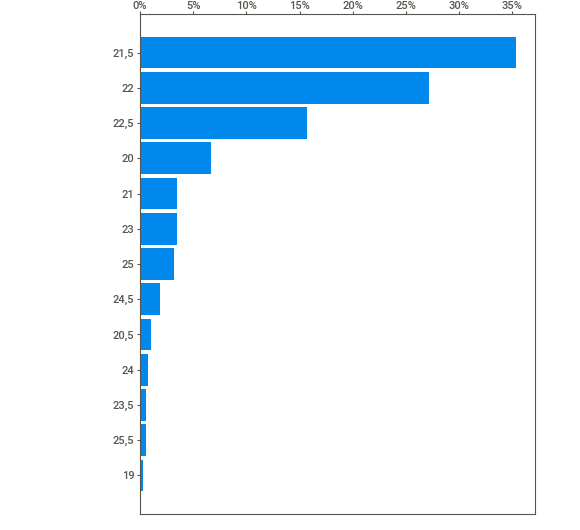
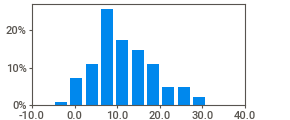
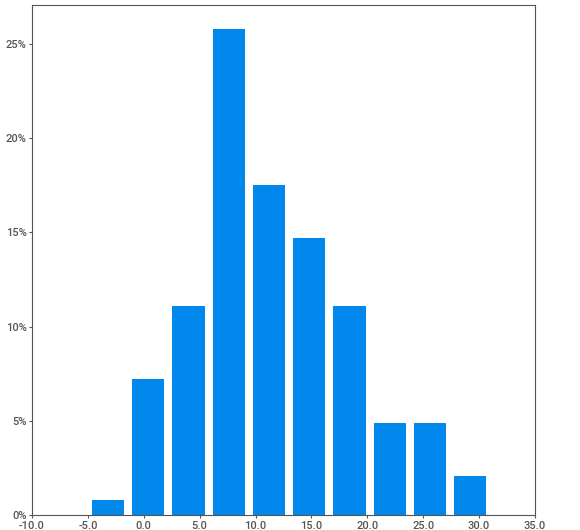
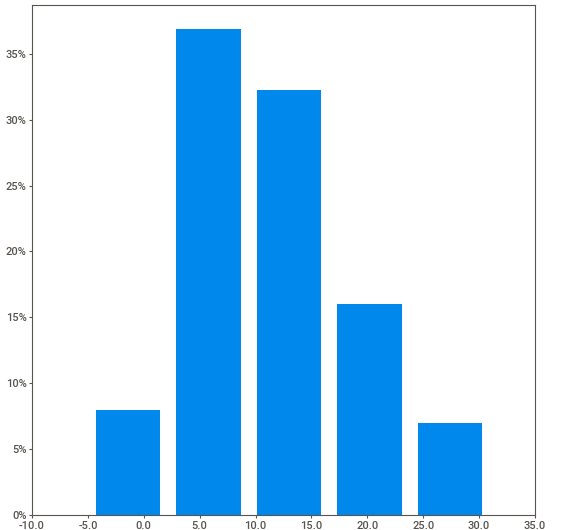
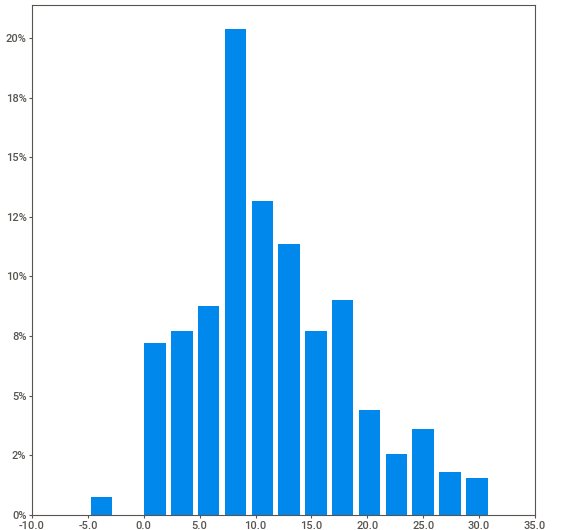
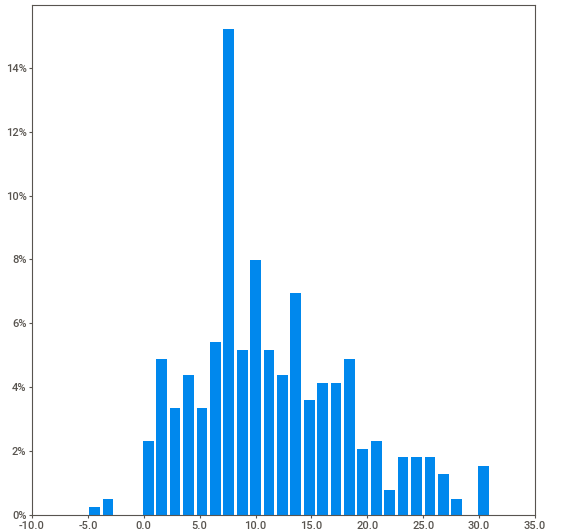
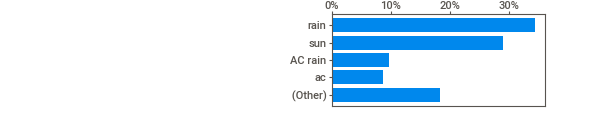
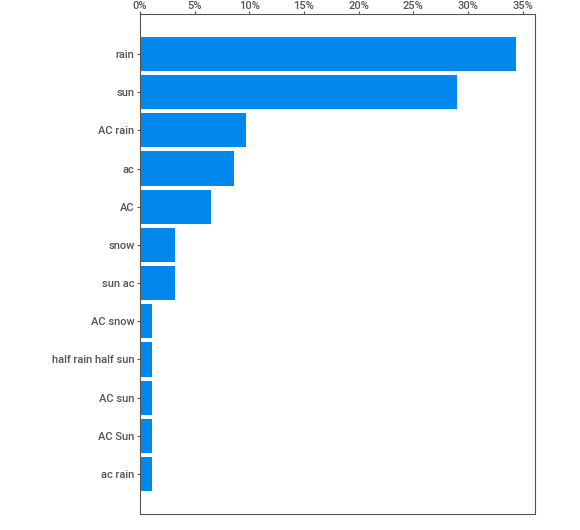
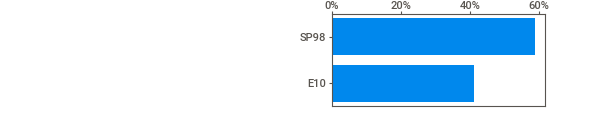
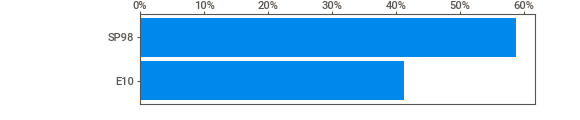
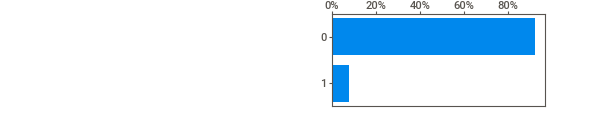
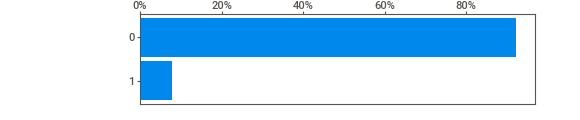
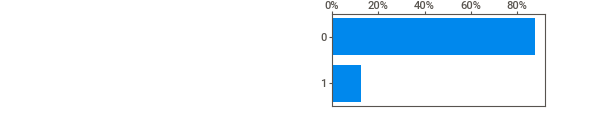
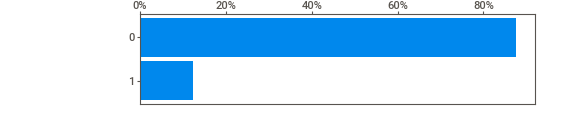
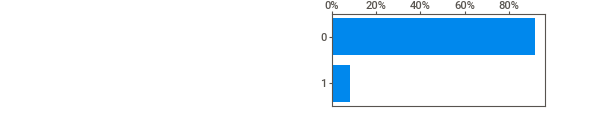
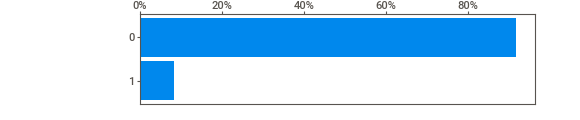
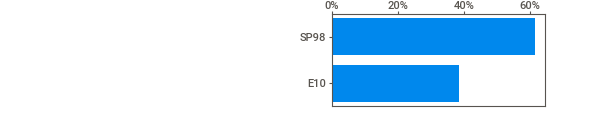
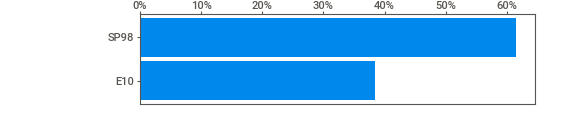
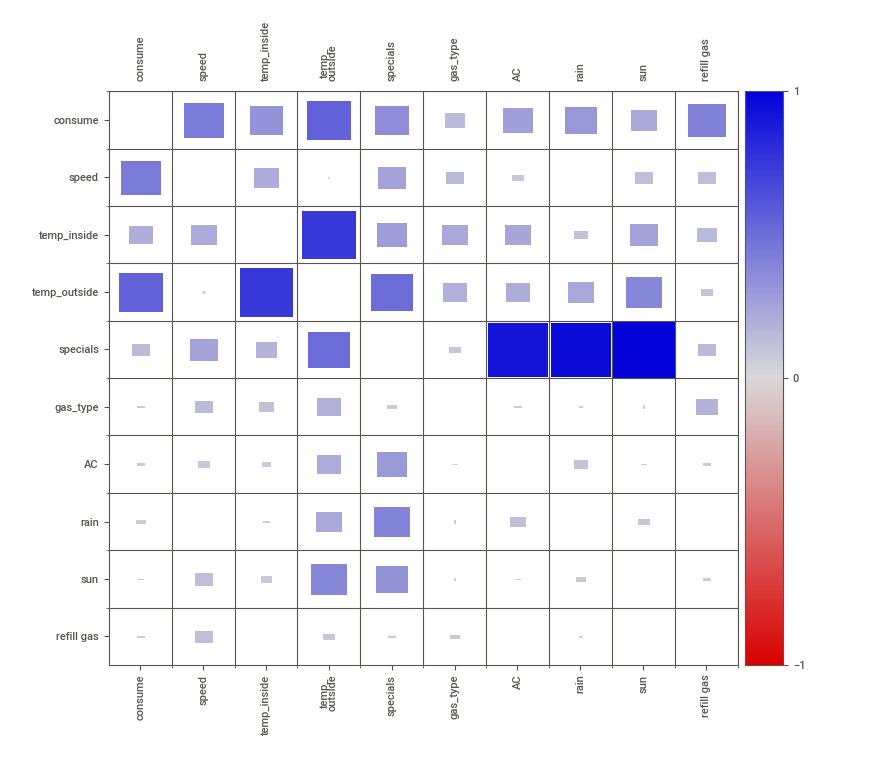
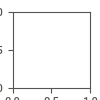

In [5]:
report_measurements.show_notebook()

In [6]:
measurements.shape

(388, 12)

In [7]:
measurements.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill liters  13 non-null     object
 11  refill gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB


In [8]:
measurements.describe()

,speed,temp_outside,AC,rain,sun
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,41.927835,11.358247,0.077320,0.123711,0.082474
std,13.598524,6.991542,0.267443,0.329677,0.275441
min,14.000000,-5.000000,0.000000,0.000000,0.000000
25%,32.750000,7.000000,0.000000,0.000000,0.000000
50%,40.500000,10.000000,0.000000,0.000000,0.000000
75%,50.000000,16.000000,0.000000,0.000000,0.000000
max,90.000000,31.000000,1.000000,1.000000,1.000000


In [9]:
measurements.describe().T

,count,mean,std,min,25%,50%,75%,max
speed,388.0,41.927835,13.598524,14.0,32.75,40.5,50.0,90.0
temp_outside,388.0,11.358247,6.991542,-5.0,7.00,10.0,16.0,31.0
AC,388.0,0.077320,0.267443,0.0,0.00,0.0,0.0,1.0
rain,388.0,0.123711,0.329677,0.0,0.00,0.0,0.0,1.0
sun,388.0,0.082474,0.275441,0.0,0.00,0.0,0.0,1.0


In [10]:
measurements.isna().sum().sort_values(ascending = False)

refill liters    375
refill gas       375
specials         295
temp_inside       12
distance           0
consume            0
speed              0
temp_outside       0
gas_type           0
AC                 0
rain               0
sun                0
dtype: int64

In [11]:
measurements.columns

Index(['distance', 'consume', 'speed', 'temp_inside', 'temp_outside',
       'specials', 'gas_type', 'AC', 'rain', 'sun', 'refill liters',
       'refill gas'],
      dtype='object')

In [12]:
measurements.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


### Limpieza de la infomación

###### Columna refill liters

In [13]:
measurements['refill liters'].unique()

array(['45', nan, '37,6', '37,7', '38', '38,3', '10', '39', '41', '37',
       '37,2'], dtype=object)

In [14]:
measurements['refill liters']= measurements['refill liters'].str.replace(',', '.')

In [15]:
measurements['refill liters'] = measurements['refill liters'].astype('float')

In [16]:
measurements['refill liters'].mean()

37.11538461538461

In [17]:
measurements['refill liters'].fillna(value='37.11',inplace=True)

###### Columna refill gas 

In [18]:
measurements['refill gas'].unique()

array(['E10', nan, 'SP98'], dtype=object)

In [19]:
measurements['refill gas'].mode()

0    SP98
Name: refill gas, dtype: object

In [20]:
measurements['refill gas'].fillna(value='SP98',inplace=True)

###### Columna specials

In [21]:
measurements['specials'].unique()

array([nan, 'AC rain', 'AC', 'rain', 'snow', 'AC snow',
       'half rain half sun', 'sun', 'AC sun', 'sun ac', 'ac', 'AC Sun',
       'ac rain'], dtype=object)

In [22]:
measurements['specials'].mode()

0    rain
Name: specials, dtype: object

In [23]:
measurements['specials'].fillna(value='rain',inplace=True)

###### Columna temp_inside

In [24]:
measurements['temp_inside'].unique()

array(['21,5', '22,5', '20', nan, '21', '20,5', '23', '23,5', '25', '24',
       '22', '19', '24,5', '25,5'], dtype=object)

In [25]:
measurements['temp_inside']= measurements['temp_inside'].str.replace(',', '.')

In [55]:
measurements['temp_inside'] = measurements['temp_inside'].astype('float')

In [27]:
measurements['temp_inside'].mean()

21.929521276595743

In [28]:
measurements['temp_inside'].fillna(value='21.92',inplace=True)

###### Columna distance

In [29]:
measurements['distance']= measurements['distance'].str.replace(',', '.')

In [30]:
measurements['distance'] = measurements['distance'].astype('float')

###### Columna consume

In [31]:
measurements['consume']= measurements['consume'].str.replace(',', '.')

In [32]:
measurements['consume'] = measurements['consume'].astype('float')

In [56]:
measurements.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       388 non-null    float64
 1   consume        388 non-null    float64
 2   speed          388 non-null    int64  
 3   temp_inside    388 non-null    float64
 4   temp_outside   388 non-null    int64  
 5   specials       388 non-null    object 
 6   gas_type       388 non-null    object 
 7   AC             388 non-null    int64  
 8   rain           388 non-null    int64  
 9   sun            388 non-null    int64  
 10  refill liters  388 non-null    object 
 11  refill gas     388 non-null    object 
dtypes: float64(3), int64(5), object(4)
memory usage: 36.5+ KB


In [57]:
measurements.head(10)

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,rain,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,rain,E10,0,0,0,37.11,SP98
2,11.2,5.5,38,21.5,15,rain,E10,0,0,0,37.11,SP98
3,12.9,3.9,36,21.5,14,rain,E10,0,0,0,37.11,SP98
4,18.5,4.5,46,21.5,15,rain,E10,0,0,0,37.11,SP98
5,8.3,6.4,50,21.5,10,rain,E10,0,0,0,37.11,SP98
6,7.8,4.4,43,21.5,11,rain,E10,0,0,0,37.11,SP98
7,12.3,5.0,40,21.5,6,rain,E10,0,0,0,37.11,SP98
8,4.9,6.4,26,21.5,4,rain,E10,0,0,0,37.11,SP98
9,11.9,5.3,30,21.5,9,rain,E10,0,0,0,37.11,SP98


### Análisis de la Información despúes de hacer la limpieza

In [35]:
measurements.describe()

,distance,consume,speed,temp_outside,AC,rain,sun
count,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000
mean,19.652835,4.912371,41.927835,11.358247,0.077320,0.123711,0.082474
std,22.667837,1.033172,13.598524,6.991542,0.267443,0.329677,0.275441
min,1.300000,3.300000,14.000000,-5.000000,0.000000,0.000000,0.000000
25%,11.800000,4.300000,32.750000,7.000000,0.000000,0.000000,0.000000
50%,14.600000,4.700000,40.500000,10.000000,0.000000,0.000000,0.000000
75%,19.000000,5.300000,50.000000,16.000000,0.000000,0.000000,0.000000
max,216.100000,12.200000,90.000000,31.000000,1.000000,1.000000,1.000000


In [36]:
measurements.describe().T

,count,mean,std,min,25%,50%,75%,max
distance,388.0,19.652835,22.667837,1.3,11.80,14.6,19.0,216.1
consume,388.0,4.912371,1.033172,3.3,4.30,4.7,5.3,12.2
speed,388.0,41.927835,13.598524,14.0,32.75,40.5,50.0,90.0
temp_outside,388.0,11.358247,6.991542,-5.0,7.00,10.0,16.0,31.0
AC,388.0,0.077320,0.267443,0.0,0.00,0.0,0.0,1.0
rain,388.0,0.123711,0.329677,0.0,0.00,0.0,0.0,1.0
sun,388.0,0.082474,0.275441,0.0,0.00,0.0,0.0,1.0


###### Gráficas de Análisis

In [37]:
corr=measurements.corr()
mask = np.triu(np.ones_like(corr))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

<AxesSubplot:>

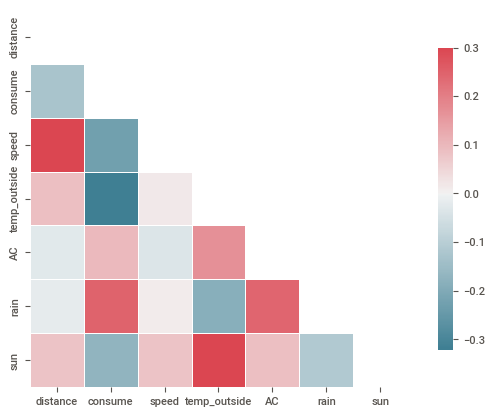

In [38]:
plt.figure(figsize=(8,5))
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": 0.8})

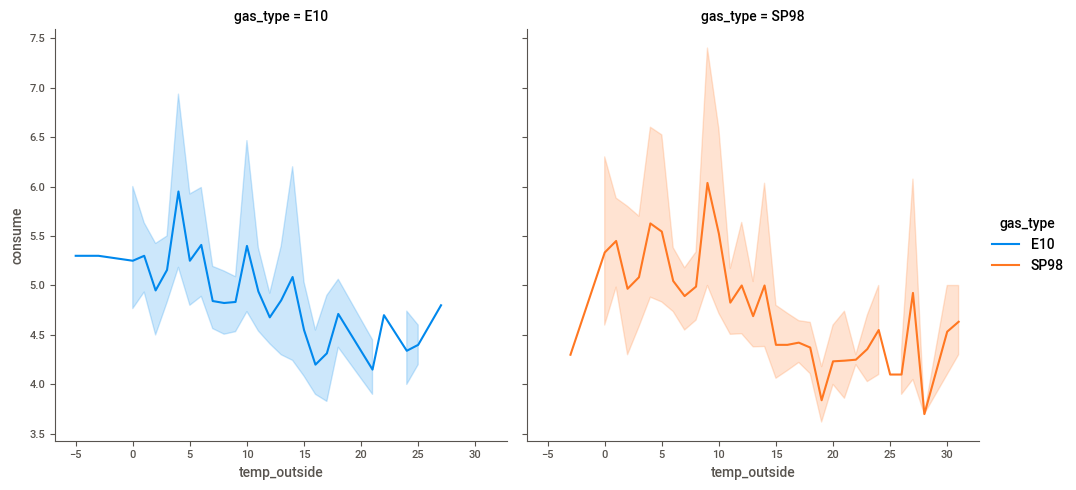

In [39]:
sns.relplot(x="temp_outside", y="consume", kind="line",hue = 'gas_type', col = 'gas_type',data=measurements)
sns.set_style("white")
plt.xlabel("temp_outside")
plt.ylabel("consume vs temp_outside")
plt.show()

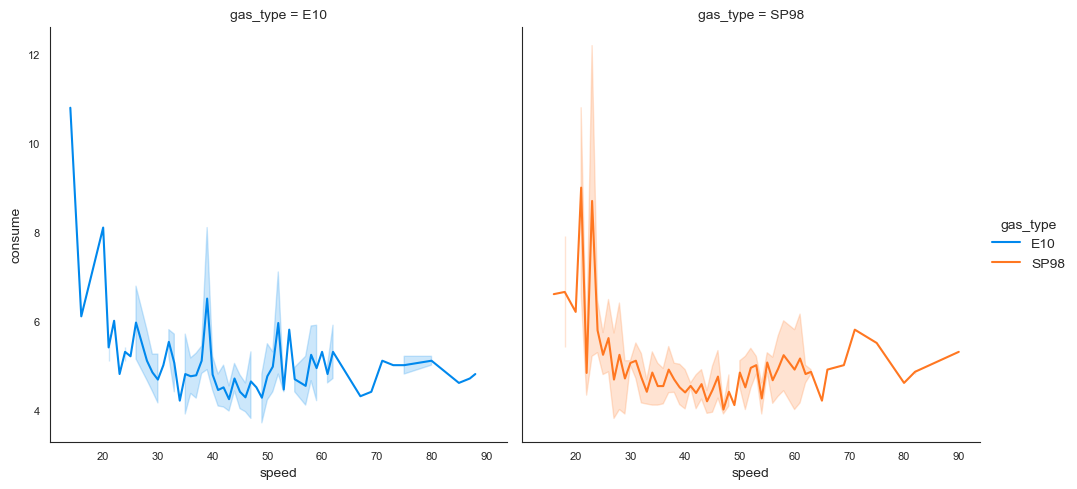

In [40]:
sns.relplot(x="speed", y="consume", kind="line",hue = 'gas_type', col = 'gas_type',data=measurements)
sns.set_style("white")
plt.xlabel("speed")
plt.ylabel("consume vs speed")
plt.show()

###### Cálculo de Correlación de Pearson entre "Speed" y "Consume"

In [41]:
corr, p_val = stats.pearsonr(measurements["speed"], measurements["consume"])
print("El Coeficiente de Correlación de Pearson es: {:.3f}".format(corr))
print("El P-value es: {:.20f}".format(p_val))

El Coeficiente de Correlación de Pearson es: -0.228
El P-value es: 0.00000579475774456910


###### Cálculo de Correlación de Pearson entre "temp_inside" y "Consume"

In [42]:
corr, p_val = stats.pearsonr(measurements["temp_inside"], measurements["consume"])
print("El Coeficiente de Correlación de Pearson es: {:.3f}".format(corr))
print("El P-value es: {:.20f}".format(p_val))

El Coeficiente de Correlación de Pearson es: -0.161
El P-value es: 0.00151391985545395492


###### Conclusiones

###### 1: La correlación entre el consumo de gasolina y la velocidad hace concluir que los choferes deben conducir a una velocidad alta dentro de los patrones de seguridad para teener un consumo bajo.
###### 2: El precio de las tarifas puede aumentar cuando la temperatura exterior es alta
###### 3: La diferencia entre los dos tipos de gasolina no es siginificativa. Se recomienda que se valide cual es la de mejor costo antes de recargar el tanque

##### Decido hacer una copia de mi data frame original para comenzar a hacer a hacer los siguientes pasos

In [58]:
measurements1=measurements.copy()

In [60]:
measurements1['unitary_price'] = measurements1['gas_type'].map({'E10': 1.38, 'SP98': 1.46})
measurements1.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas,unitary_price
0,28.0,5.0,26,21.5,12,rain,E10,0,0,0,45.0,E10,1.38
1,12.0,4.2,30,21.5,13,rain,E10,0,0,0,37.11,SP98,1.38
2,11.2,5.5,38,21.5,15,rain,E10,0,0,0,37.11,SP98,1.38
3,12.9,3.9,36,21.5,14,rain,E10,0,0,0,37.11,SP98,1.38
4,18.5,4.5,46,21.5,15,rain,E10,0,0,0,37.11,SP98,1.38


In [61]:
measurements1['total_price'] = measurements1['consume']*measurements1['unitary_price']
measurements1.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas,unitary_price,total_price
0,28.0,5.0,26,21.5,12,rain,E10,0,0,0,45.0,E10,1.38,6.900
1,12.0,4.2,30,21.5,13,rain,E10,0,0,0,37.11,SP98,1.38,5.796
2,11.2,5.5,38,21.5,15,rain,E10,0,0,0,37.11,SP98,1.38,7.590
3,12.9,3.9,36,21.5,14,rain,E10,0,0,0,37.11,SP98,1.38,5.382
4,18.5,4.5,46,21.5,15,rain,E10,0,0,0,37.11,SP98,1.38,6.210


In [62]:
measurements1 = measurements1.drop(columns=['refill liters','refill gas','specials'])

In [63]:
measurements1.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,unitary_price,total_price
0,28.0,5.0,26,21.5,12,E10,0,0,0,1.38,6.900
1,12.0,4.2,30,21.5,13,E10,0,0,0,1.38,5.796
2,11.2,5.5,38,21.5,15,E10,0,0,0,1.38,7.590
3,12.9,3.9,36,21.5,14,E10,0,0,0,1.38,5.382
4,18.5,4.5,46,21.5,15,E10,0,0,0,1.38,6.210


In [64]:
measurements1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       388 non-null    float64
 1   consume        388 non-null    float64
 2   speed          388 non-null    int64  
 3   temp_inside    388 non-null    float64
 4   temp_outside   388 non-null    int64  
 5   gas_type       388 non-null    object 
 6   AC             388 non-null    int64  
 7   rain           388 non-null    int64  
 8   sun            388 non-null    int64  
 9   unitary_price  388 non-null    float64
 10  total_price    388 non-null    float64
dtypes: float64(5), int64(5), object(1)
memory usage: 33.5+ KB


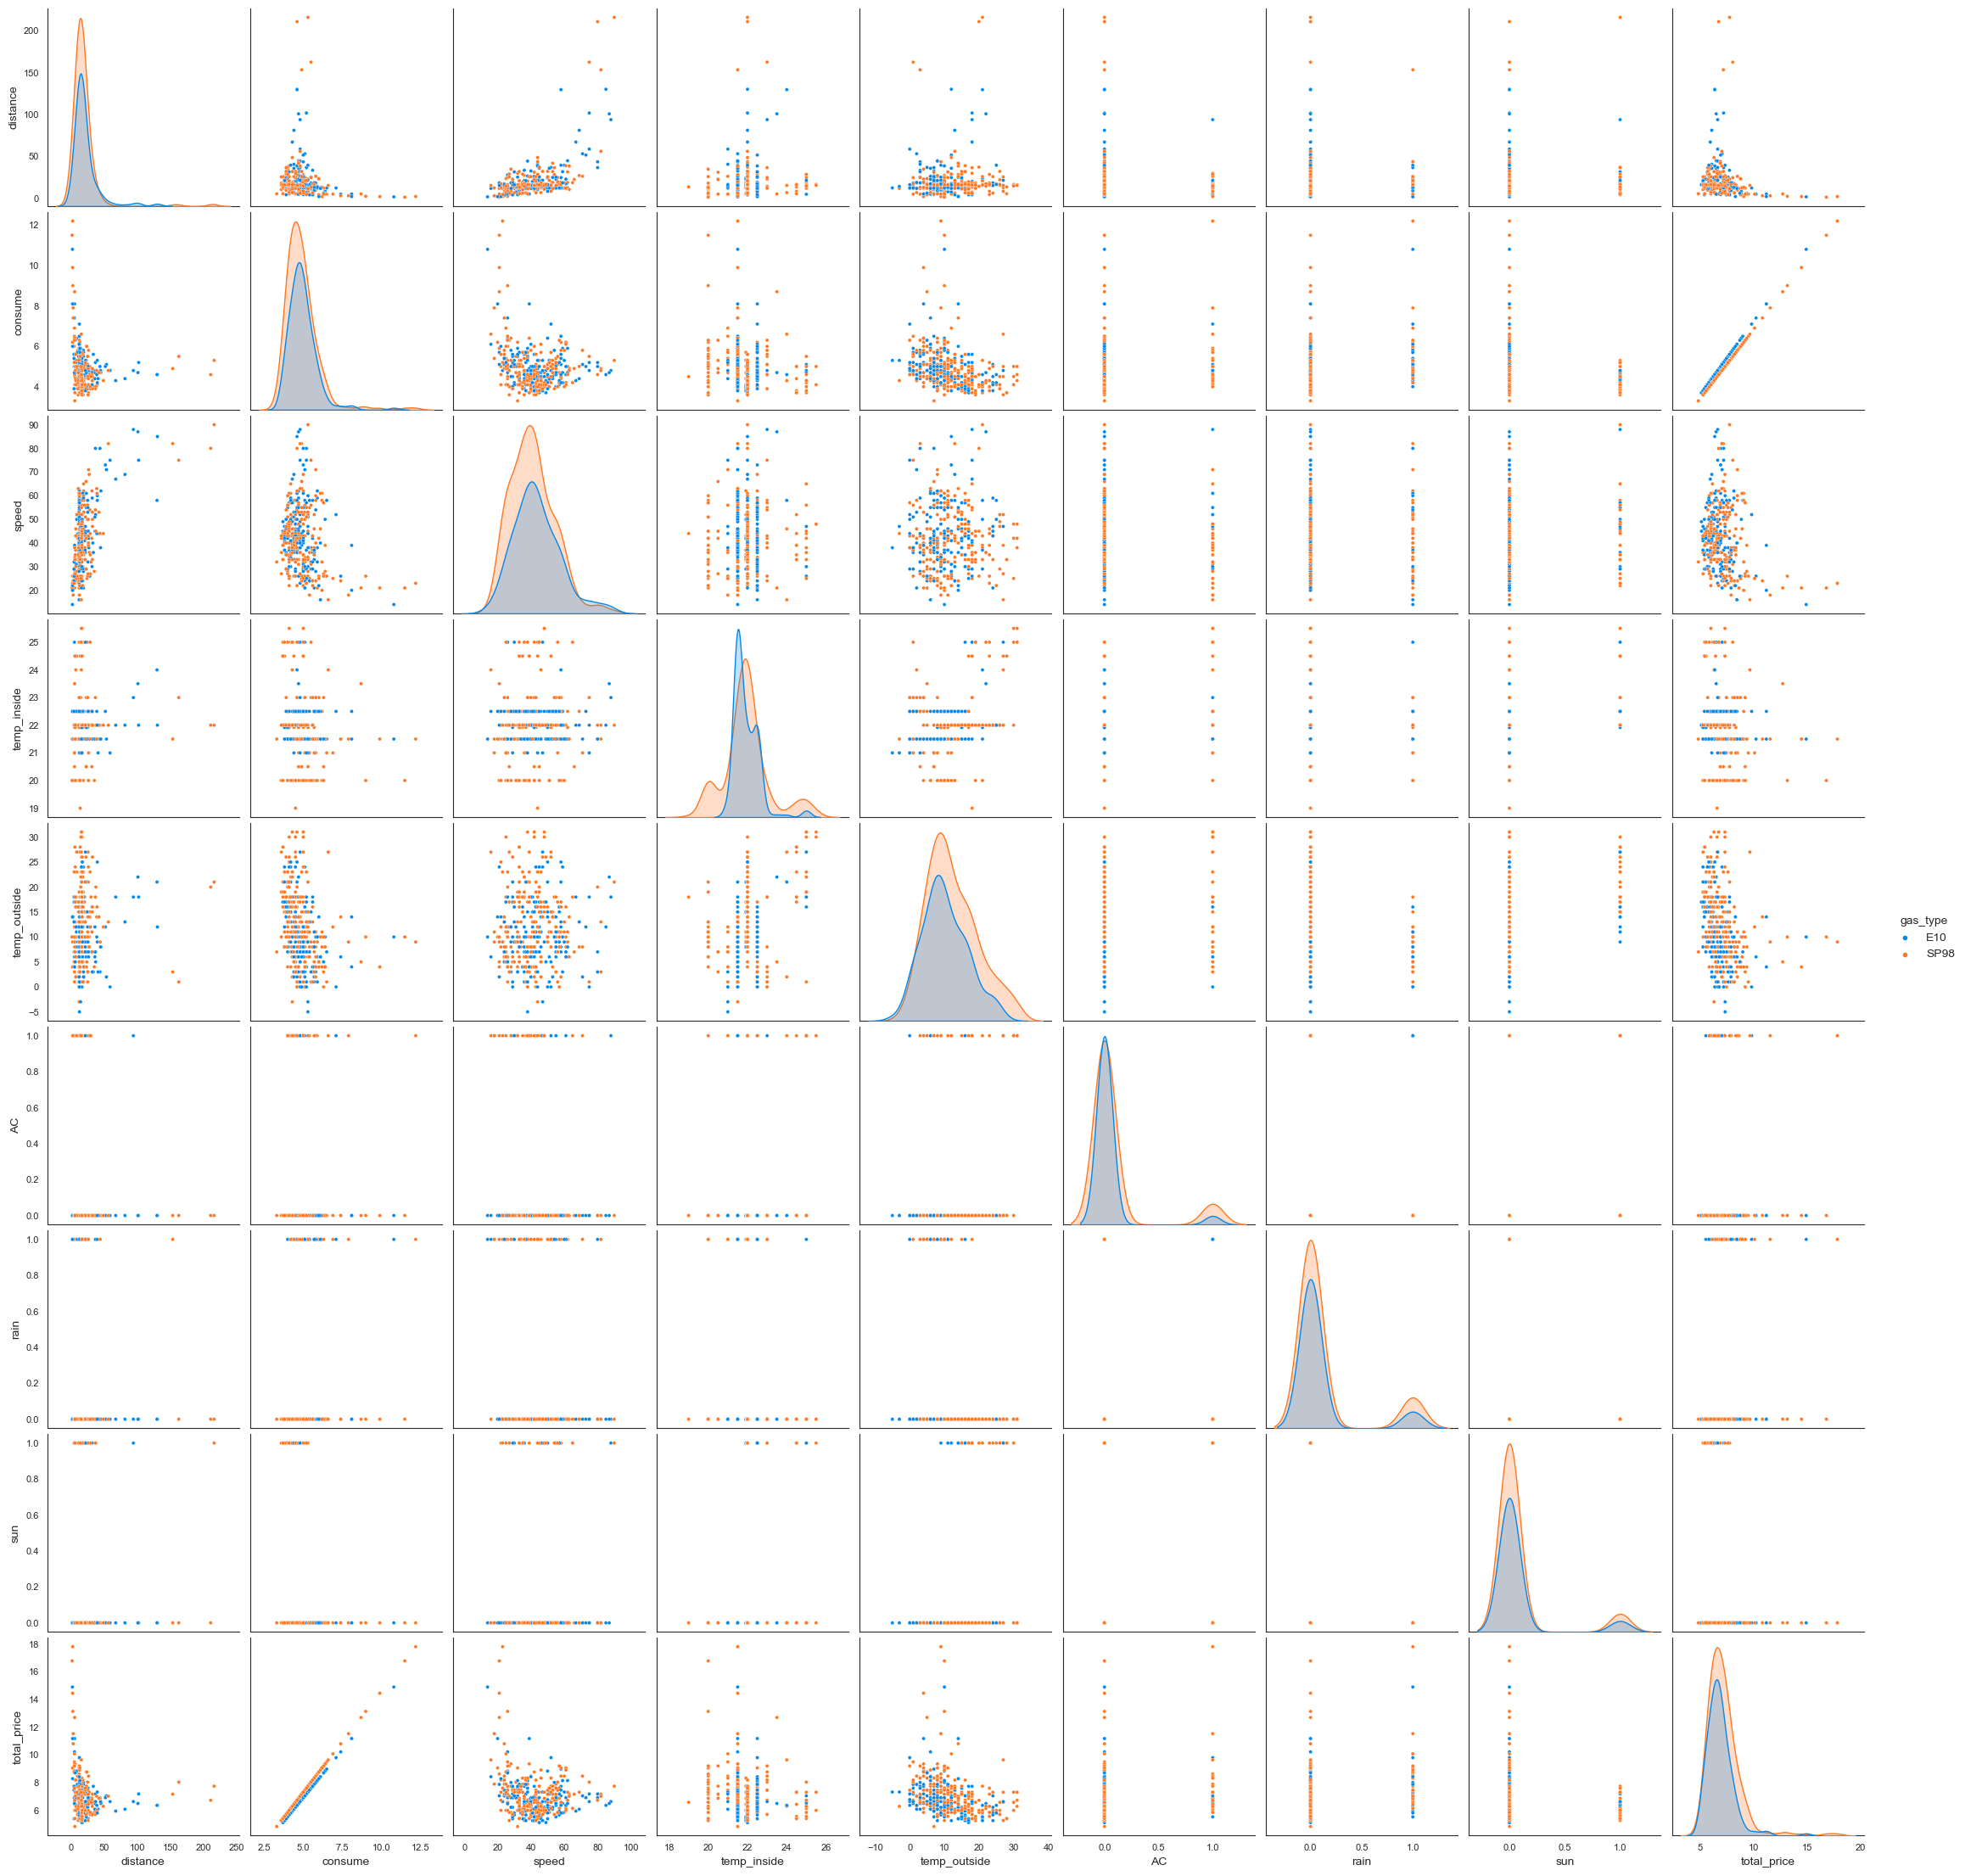

In [65]:
sns.pairplot(measurements1.drop(columns=['unitary_price']), hue='gas_type')
plt.show()

### Modelo

In [67]:
X = measurements1.drop(columns=['consume','total_price','unitary_price','gas_type'])
y = measurements1['consume']

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

X_train.columns = X.columns
X_test.columns = X.columns

In [93]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression().fit(X_train, y_train)
y_pred_train = model_lr.predict(X_train)
y_pred_test = model_lr.predict(X_test)
y_true_train = y_train
y_true_test = y_test

In [94]:
y_true_test

191    4.7
217    4.4
350    4.8
375    3.7
387    5.0
      ... 
286    4.0
376    4.3
298    4.5
222    5.2
258    6.0
Name: consume, Length: 78, dtype: float64